<a href="https://colab.research.google.com/github/tanushkathakre/Chatbot/blob/main/DRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, accuracy_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
col_names = ['Freq'	,'Hd'	,'Rd'	,'Rs'	,'S']
ds = pd.read_csv('/content/final dataset - final dataset.csv')
ds2 = pd.read_csv('/content/test.csv')
# knnImplementation(ds)
# knnImplementation(ds,ds2)
# rfImplementation(ds,ds2)
# annImplementationLogistic(ds,ds2)
elasticNetImplementation(ds, ds2)


NameError: name 'elasticNetImplementation' is not defined

In [4]:
from sklearn.linear_model import ElasticNet


# Dataset Generation

In [ ]:
def cleanData():
  cleaned_db = pd.read_c sv('cleandataset.csv')
  final_db = pd.read_csv('finaldataset.csv')
  list_of_column_names = []
  for col in final_db.columns:
    list_of_column_names.append(col)
  list_of_column_names.pop(0)

  i = 1
  for element in list_of_column_names:
    values = element.split()
    hd = values[3]
    rd = values[4]
    rs = values[5]
    hd = hd[4:-3]
    rd = rd[4:-3]
    rs = rs[4:-3]
    for row in range(len(final_db)):
      freq = final_db.iloc[row,0]
      s = final_db.iloc[row,i]
      data = {
          'Freq': [freq],
          'Hd': [hd],
          'Rd':[rd],
          'Rs':[rs],
          'S':[s]
      }
      df = pd.DataFrame(data)
      #print(df)
      df.to_csv('cleandataset.csv', mode='a', index=False, header=False)
    i = i+1







# KNN Implemetation

In [ ]:
def knnImplementation(pi, pi2):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 4].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  # scaler = StandardScaler()
  # scaler.fit(X_train)
  # X_train = scaler.transform(X_train)
  # X_test = scaler.transform(X_test)
  knn = KNeighborsRegressor(n_neighbors=7)
  knn.fit(X_train, y_train)
  knn_y_pred = knn.predict(X_test)
  print("K NEAREST NEIGHBORS RESULTS")
  # print(knn_y_pred)
  error = mean_squared_error(y_test,knn_y_pred,squared=False)
  print(f"KNN MSE: {error}")
  print(f"KNN Score: {knn.score(X_test, y_test)}")
  # graphImplementation(y_test, knn_y_pred)
  print("Knn graph of actual vs predicted value")

  xfig = pi2.iloc[:, 0].values
  xTest = pi2.iloc[:,:-1].values
  yfig = pi2.iloc[:, 4].values
  yfig2 = knn.predict(xTest)

  plt.figure(figsize=(10,10))
  plt.plot(xfig, yfig, color='r', label='True S11')
  plt.plot(xfig, yfig2, color='g', label='Predicted S11')
  plt.ylabel("dB(S(1,1))")
  plt.xlabel("Freq(GHz)")
  plt.title("Freq v/s dB(S(1,1))")

  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()

  # To load the display window
  plt.show()
  # print(r2_score(y_test,knn_y_pred))

In [ ]:
def graphImplementation(y_test, pred_y_test):
#  plt.scatter(y_test, pred_y_test)
#  plt.xlabel('True Values ')
#  plt.ylabel('Predictions ')
#  plt.axis('equal')
#  plt.axis('square')
#  plt.xlim([0, plt.xlim()])
#  plt.ylim([0, plt.ylim()])
#  _ = plt.plot([-100, 100], [-100, 100])
  plt.figure(figsize=(10,10))
  plt.scatter(y_test, pred_y_test, c='crimson')
  # plt.yscale('log')
  # plt.xscale('log')

  p1 = max(max(pred_y_test), max(y_test))
  p2 = min(min(pred_y_test), min(y_test))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.show()


# RF Implementation

In [ ]:
def rfImplementation(pi, pi2):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 4].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  # scaler = StandardScaler()
  # scaler.fit(X_train)
  # X_train = scaler.transform(X_train)
  # X_test = scaler.transform(X_test)
  rf = RandomForestRegressor(max_depth=2,n_estimators=30, min_samples_split=3,max_leaf_nodes=5,random_state=42)
  rf = RandomForestRegressor()
  rf.fit(X_train, y_train)
  rf_y_pred = rf.predict(X_test)
  # print(rf_y_pred)
  print("Random Forest RESULTS")
  error = mean_squared_error(y_test,rf_y_pred,squared=False)
  print(f"RF MSE: {error}")
  print(f"RF Score: {rf.score(X_test, y_test)}")
  print(r2_score(y_test,rf_y_pred))
  graphImplementation(y_test, rf_y_pred)
  print("rf graph of actual vs predicted value")

  xfig = pi2.iloc[:, 0].values
  xTest = pi2.iloc[:,:-1].values
  yfig = pi2.iloc[:, 4].values
  yfig2 = rf.predict(xTest)

  plt.figure(figsize=(10,10))
  plt.plot(xfig, yfig, color='r', label='True S11')
  plt.plot(xfig, yfig2, color='g', label='Predicted S11')
  plt.ylabel("dB(S(1,1))")
  plt.xlabel("Freq(GHz)")
  plt.title("Freq v/s dB(S(1,1))")

  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()

  # To load the display window
  plt.show()
  # print(r2_score(y_test,knn_y_pred))


In [ ]:
def annImplementationTanh(pi,pi2):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 4].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='tanh', solver='adam', max_iter=500)
  mlp.fit(X_train,y_train)

  mlp_y_pred = mlp.predict(X_test)
  error = mean_squared_error(y_test,mlp_y_pred,squared=False)
  print(f"ANN with tanh as activation function  MSE: {error}")
  print(f"ANN  with tanh as activation function Score: {mlp.score(X_test, y_test)}")
  graphImplementation(y_test, mlp_y_pred)
  print("tanh graph of actual vs predicted value")

  xfig = pi2.iloc[:, 0].values
  xTest = pi2.iloc[:,:-1].values
  yfig = pi2.iloc[:, 4].values
  yfig2 = mlp.predict(xTest)

  plt.figure(figsize=(10,10))
  plt.plot(xfig, yfig, color='r', label='True S11')
  plt.plot(xfig, yfig2, color='g', label='Predicted S11')
  plt.ylabel("dB(S(1,1))")
  plt.xlabel("Freq(GHz)")
  plt.title("Freq v/s dB(S(1,1))")

  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()

  # To load the display window
  plt.show()
  # print(r2_score(y_test,knn_y_pred))

In [ ]:
def annImplementationLogistic(pi,pi2):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 4].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='logistic', solver='adam', max_iter=500)
  mlp.fit(X_train,y_train)

  mlp_y_pred = mlp.predict(X_test)
  error = mean_squared_error(y_test,mlp_y_pred,squared=False)
  print(f"ANN  with logistic as activation function MSE: {error}")
  print(f"ANN with logistic as activation function Score: {mlp.score(X_test, y_test)}")
  graphImplementation(y_test, mlp_y_pred)
  print("logistic graph of actual vs predicted value")


  xfig = pi2.iloc[:, 0].values
  xTest = pi2.iloc[:,:-1].values
  yfig = pi2.iloc[:, 4].values
  yfig2 = mlp.predict(xTest)

  plt.figure(figsize=(10,10))
  plt.plot(xfig, yfig, color='r', label='True S11')
  plt.plot(xfig, yfig2, color='g', label='Predicted S11')
  plt.ylabel("dB(S(1,1))")
  plt.xlabel("Freq(GHz)")
  plt.title("Freq v/s dB(S(1,1))")

  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()

  # To load the display window
  plt.show()
  # print(r2_score(y_test,knn_y_pred))

# ...

# ElasticNet Implementation


In [ ]:
def elasticNetImplementation(pi,pi2):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 4].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
  en = ElasticNet()
  en.fit(X_train, y_train)
  en_y_pred = en.predict(X_test)
  print("Elastic Net results")
  error = mean_squared_error(y_test,en_y_pred,squared=False)
  print(f"Elastic Net MSE: {error}")
  print(f"Elastic Net Score: {en.score(X_test, y_test)}")
  graphImplementation(y_test, en_y_pred)

  xfig = pi2.iloc[:, 0].values
  xTest = pi2.iloc[:,:-1].values
  yfig = pi2.iloc[:, 4].values
  yfig2 = en.predict(xTest)

  plt.figure(figsize=(10,10))
  plt.plot(xfig, yfig, color='r', label='True S11')
  plt.plot(xfig, yfig2, color='g', label='Predicted S11')
  plt.ylabel("dB(S(1,1))")
  plt.xlabel("Freq(GHz)")
  plt.title("Freq v/s dB(S(1,1))")

  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()

  # To load the display window
  plt.show()
  # print(r2_score(y_test,knn_y_pred))

# Implement functions here

Random Forest RESULTS
RF MSE: 0.3936008910707589
RF Score: 0.9919430716664751


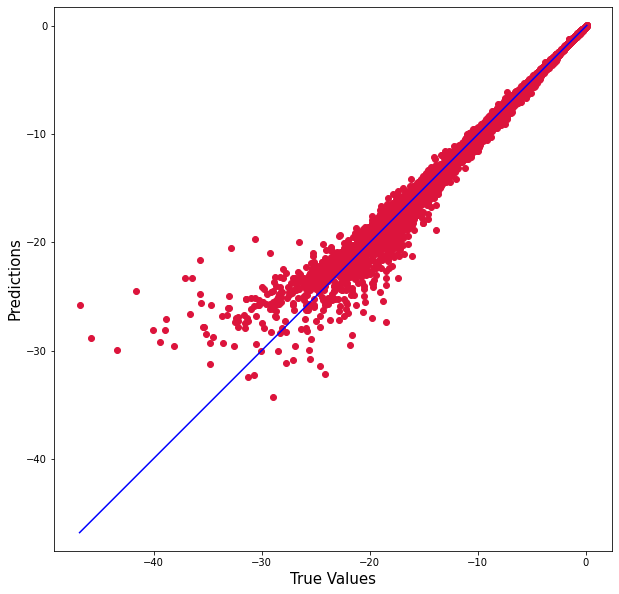

rf graph of actual vs predicted value


In [ ]:
# knnImplementation(ds)
rfImplementation(ds)
# annImplementationTanh(ds)
# annImplementationLogistic(ds)
# elasticNetImplementation(ds)
